In [1]:
import gridgeo

gridgeo.__version__

'0.1.0'

In [2]:
import iris

url = ('http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/jcwarner/'
       'Projects/Sandy/triple_nest/00_dir_NYB05.ncml')

cubes = iris.load_raw(url)

/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/iris/fileformats/cf.py:1046: UserWarning: Ignoring formula terms variable u'h' referenced by data variable u'v_stokes' via variable u's_rho': Dimensions (u'eta_rho', u'xi_rho') do not span (u'ocean_time', u's_rho', u'eta_v', u'xi_v')
  warnings.warn(msg)
/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/iris/fileformats/cf.py:1046: UserWarning: Ignoring formula terms variable u'zeta' referenced by data variable u'v_stokes' via variable u's_rho': Dimensions (u'ocean_time', u'eta_rho', u'xi_rho') do not span (u'ocean_time', u's_rho', u'eta_v', u'xi_v')
  warnings.warn(msg)
/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/iris/fileformats/cf.py:1046: UserWarning: Ignoring formula terms variable u'h' referenced by data variable u'u_stokes' via variable u's_rho': Dimensions (u'eta_rho', u'xi_rho') do not span (u'ocean_time', u's_rho', u'eta_u', u'xi_u')
  warnings.warn(msg)
/home/filipe/.virtualenvs/iris/lib/pytho

In [3]:
salt = cubes.extract_strict('sea_water_salinity')
u = cubes.extract_strict('x_sea_water_velocity')
v = cubes.extract_strict('y_sea_water_velocity')

In [4]:
rho = gridgeo.GridGeo(salt)
ug = gridgeo.GridGeo(u)
vg = gridgeo.GridGeo(v)

In [5]:
print('There are {} polygons in rho.'.format(len(rho.polygons)))
print('There are {} polygons in u-grid.'.format(len(ug.polygons)))
print('There are {} polygons in v-grid.'.format(len(vg.polygons)))

There are 36464 polygons in rho.
There are 36358 polygons in u-grid.
There are 36120 polygons in v-grid.


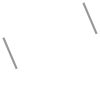

In [6]:
vg.outline.difference(ug.outline)

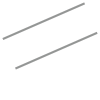

In [7]:
ug.outline.difference(vg.outline)

In [8]:
import folium

x, y = rho.outline.centroid.xy

mapa = folium.Map(location=[y[0], x[0]])

min_lon, min_lat, max_lon, max_lat = rho.outline.bounds
mapa.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

folium.GeoJson(rho.outline.union(ug.outline).union(vg.outline).__geo_interface__).add_to(mapa)
folium.GeoJson(vg.outline.difference(ug.outline).__geo_interface__,
               style_function=lambda feature: {'color' : '#FF8C00'}).add_to(mapa)
folium.GeoJson(ug.outline.difference(vg.outline).__geo_interface__,
               style_function=lambda feature: {'color' : '#006400'}).add_to(mapa)

mapa